### Importación de Tensorflow

In [0]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

### Importación de datos

In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data( )

### verificando los datos de prueba

In [0]:
y_train.shape

(60000,)

In [0]:
x_train.shape

(60000, 28, 28)

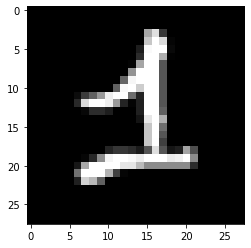

In [0]:
imagendemo=x_train[24]
plt.imshow(imagendemo,cmap='gray')

In [0]:
def image_matrix(img):
    print('\n'.join([''.join(['{:4}'.format(int(round(item*255))) for item in row]) 
      for row in img]))

In [0]:
image_matrix(imagendemo)

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0423305661014025   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   05023564770555901275   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   073956349564770647702295   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   011475647706477044370 510   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0102041820647706477021675   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   03723064770647706477021675  

## Preparando los datos para el entrenamiento
 
La x debe ser convertida a un vector para que pueda ser procesada por la red perceptrón profunda 

In [0]:
x_train=x_train.reshape(-1,28*28).astype('float32')
x_test=x_test.reshape(-1,28*28).astype('float32')
x_train.shape

(60000, 784)

In [0]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Las salidas y deben se codificadas en one hot

In [0]:
# onehot encode
onehot_encoder = OneHotEncoder(sparse=False)
y_train = y_train.reshape(len(y_train), 1)
y_train_onehot = onehot_encoder.fit_transform(y_train)

y_test = y_test.reshape(len(y_test), 1)
y_test_onehot = onehot_encoder.fit_transform(y_test)

y_train_onehot.shape

(60000, 10)

### Declarando la arquitectura

Generando función 

In [0]:
class DNN_model(object):
  def __init__(self,
               n_nodes_hl1=50,
               n_nodes_hl2=2,
               n_nodes_hl3=50,
               n_classes=784):
    self.h1LW = tf.Variable(np.random.normal(size=(784, n_nodes_hl1)),name="hl1weigths",dtype="float32")
    self.h1LB = tf.Variable(np.random.normal(size=(n_nodes_hl1)),name="hl1bias",dtype="float32")
    self.h2LW = tf.Variable(np.random.normal(size=(n_nodes_hl1, n_nodes_hl2)),name="hl2weigths",dtype="float32")
    self.h2LB = tf.Variable(np.random.normal(size=(n_nodes_hl2)),name="hl2bias",dtype="float32")
    self.h3LW = tf.Variable(np.random.normal(size=(n_nodes_hl2, n_nodes_hl3)),name="hl3weigths",dtype="float32")
    self.h3LB = tf.Variable(np.random.normal(size=(n_nodes_hl3)),name="hl3bias",dtype="float32")
    self.outW = tf.Variable(np.random.normal(size=(n_nodes_hl3, n_classes)),name="outweigths",dtype="float32")
    self.outB = tf.Variable(np.random.normal(size=(n_classes)),name="outbias",dtype="float32")
    self.trainable_variables =[self.h1LW,self.h1LB,self.h2LW,self.h2LB,self.h3LW,self.h3LB,self.outW,self.outB]          
  def __call__(self,x): 
      # Declarando la arquitectura

      l1 = tf.add(tf.matmul(x,self.h1LW), self.h1LB)
      l1 = tf.nn.tanh(l1) #tf.nn.relu(l1)

      l2 = tf.add(tf.matmul(l1,self.h2LW), self.h2LB)
      l2 = tf.nn.tanh(l2) #tf.nn.relu(l2)

      l3 = tf.add(tf.matmul(l2,self.h3LW), self.h3LB)
      l3 = tf.nn.tanh(l3) #tf.nn.relu(l3)

      l4 = tf.add(tf.matmul(l3,self.outW), self.outB)
      output = tf.nn.relu(l4)
      return output

In [0]:
DNN = DNN_model()
DNN(x_train[24:30])

<tf.Tensor: shape=(6, 784), dtype=float32, numpy=
array([[ 5.745213 ,  0.       ,  0.       , ...,  0.       ,  3.264129 ,
         4.764497 ],
       [ 3.533142 ,  0.       ,  0.       , ..., 10.485279 ,  0.       ,
         7.37708  ],
       [ 5.7452154,  0.       ,  0.       , ...,  0.       ,  3.2641323,
         4.764495 ],
       [ 8.781722 ,  0.       ,  0.       , ...,  3.843854 ,  0.       ,
        11.950461 ],
       [11.50591  ,  0.       ,  0.       , ...,  0.       ,  0.       ,
        13.381137 ],
       [ 5.745206 ,  0.       ,  0.       , ...,  0.       ,  3.2641232,
         4.764502 ]], dtype=float32)>

Seleccionar un optimizador 

In [0]:
#optimizador = tf.compat.v1.train.AdamOptimizer(learning_rate=1e-1)
optimizador = tf.keras.optimizers.Adam(learning_rate=.0001 )

### Definir las metricas a usar

In [0]:
train_loss = tf.keras.metrics.Mean(name='train_loss')


test_loss = tf.keras.metrics.Mean(name='test_loss')


### Calculo de gradientes y ajuste 

In [0]:
@tf.function
def train_step(model,tdata, labels):
  with tf.GradientTape() as tape:
    predictions = model(tdata)
    #calculo de una funcion de error 
    loss = tf.reduce_mean(tf.math.squared_difference(labels, predictions))
   
  gradients = tape.gradient(loss, model.trainable_variables)
  capped_grads_and_vars = [(grad,model.trainable_variables[index]) for index, grad in enumerate(gradients)]
  optimizador.apply_gradients(capped_grads_and_vars)
  train_loss(loss)
  

In [0]:
@tf.function
def test_step(model,tdata, labels):
  predictions = model(tdata)
  t_loss =  tf.reduce_mean(tf.math.squared_difference(labels, predictions))

  test_loss(t_loss)
  

## función de entrenamiento  y prueba

In [0]:
def fitting(model,train_x,train_y,test_x,test_y,EPOCHS,N_batch,batch_size):
  for epoch in range(EPOCHS):
    i=0
    while i+batch_size < len(train_x) or i+batch_size<batch_size*N_batch:
      start = i
      end = i+batch_size
      batch_x = train_x[start:end]
      batch_y = train_y[start:end]
      train_step(model,batch_x,batch_y)
      i+=batch_size

    test_step(model,test_x,test_y)
    if epoch%50==0:  
      template = 'Epoch {}, Perdida: {}, Perdida de prueba: {}'
      print(template.format(epoch+1,train_loss.result(),test_loss.result()))
    train_loss.reset_states()
    test_loss.reset_states()


In [0]:
fitting(DNN,x_train,x_train,x_test,x_test,2000,3000,20)

Epoch 1, Perdida: 6928.802734375, Perdida de prueba: 6743.623046875
Epoch 51, Perdida: 4226.15185546875, Perdida de prueba: 4238.9833984375
Epoch 101, Perdida: 3998.43359375, Perdida de prueba: 3995.592529296875
Epoch 151, Perdida: 3829.059326171875, Perdida de prueba: 3816.255859375
Epoch 201, Perdida: 3685.779296875, Perdida de prueba: 3668.29345703125
Epoch 251, Perdida: 3604.177001953125, Perdida de prueba: 3585.514404296875
Epoch 301, Perdida: 3537.08544921875, Perdida de prueba: 3518.723388671875
Epoch 351, Perdida: 3478.596435546875, Perdida de prueba: 3461.27783203125
Epoch 401, Perdida: 3424.8310546875, Perdida de prueba: 3410.821044921875
Epoch 451, Perdida: 3381.074951171875, Perdida de prueba: 3367.99560546875
Epoch 501, Perdida: 3331.384765625, Perdida de prueba: 3318.550048828125
Epoch 551, Perdida: 3288.205078125, Perdida de prueba: 3276.375244140625
Epoch 601, Perdida: 3262.1484375, Perdida de prueba: 3252.44921875
Epoch 651, Perdida: 3239.945068359375, Perdida de prueb

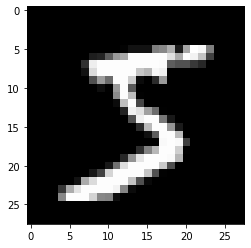

In [0]:
plt.imshow(np.reshape(x_train[0],(28,28)),cmap='gray')

784


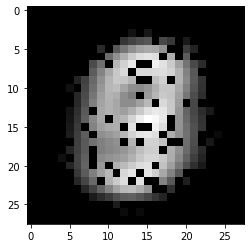

In [0]:
import matplotlib.pyplot as plt
img=DNN(x_train[24:30])
print(len(img[1]))

plt.imshow(np.reshape(img[2],(28,28)),cmap='gray')